In [39]:
# !pip3 install apafib
# !pip3 install plotly

In [40]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas import read_csv
import matplotlib as mpl

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import LocallyLinearEmbedding
from IPython.display import display, HTML

In [41]:
from apafib import load_BCN_IBEX
data = load_BCN_IBEX()
data.head()

,Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,Dades meteorològiques: Vent / Barcelona - Zona Universitària,Estat del trànsit segons trams horaris / Matí (6-13),Estat del trànsit segons trams horaris / Nit (0-5),Estat del trànsit segons trams horaris / Tarda (14-19),Estat del trànsit segons trams horaris / Vespre (20-24),IPC interanual / Barcelona,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya,Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa,Preu electricitat (majorista) /,Matriculacions de vehicles a Barcelona / Turismes,Mercat bursàtil: IBEX-35 /
0,115.0,0.0,8.01,5.61,1.3315,1.1320,1.3569,1.2932,0.5,3.0,82.0,64.0,42.510000,0.0,8079.0
1,115.0,0.0,5.96,6.51,1.5194,1.3092,1.5811,1.3750,0.5,3.0,106.0,87.0,48.720417,0.0,8079.0
2,115.0,0.0,5.31,5.52,1.3979,1.1893,1.4745,1.3311,0.5,2.0,138.0,134.0,46.927500,0.0,8079.0
3,115.0,0.0,5.72,5.13,1.8664,1.2005,1.9598,1.5096,0.5,3.0,149.0,114.0,59.849583,21.0,8079.0
4,115.0,0.0,5.23,4.25,1.8802,1.2213,1.9231,1.4455,0.5,1.0,103.0,81.0,67.545417,54.0,8062.9


In [42]:
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges,365.0,258.920548,99.042957,27.000000,210.000000,266.000000,310.000000,491.0000
Dades meteorològiques: Precipitació / Barcelona - Zona Universitària,365.0,0.928493,4.056891,0.000000,0.000000,0.000000,0.000000,50.8000
Dades meteorològiques: Temperatura / Barcelona - Zona Universitària,365.0,17.186411,6.033962,4.640000,12.360000,16.360000,23.460000,28.6600
Dades meteorològiques: Vent / Barcelona - Zona Universitària,365.0,4.623973,1.754966,1.630000,3.450000,4.330000,5.390000,12.7300
Estat del trànsit segons trams horaris / Matí (6-13),365.0,1.864942,0.225878,1.317400,1.656700,1.955500,2.036100,2.2897
Estat del trànsit segons trams horaris / Nit (0-5),365.0,1.230517,0.061187,1.132000,1.190900,1.218100,1.251100,1.4916
Estat del trànsit segons trams horaris / Tarda (14-19),365.0,1.943377,0.252567,1.272600,1.736100,1.999600,2.152100,2.3709
Estat del trànsit segons trams horaris / Vespre (20-24),365.0,1.557425,0.160126,1.230400,1.475400,1.536000,1.612300,2.2380
IPC interanual / Barcelona,365.0,2.735068,1.739372,-0.100000,1.800000,2.500000,4.900000,5.8000
Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica,365.0,6.276712,4.245570,1.000000,2.000000,6.000000,10.000000,17.0000


In [43]:
data.columns

Index(['Compra-Venda d'habitatges a Barcelona (Nombre de transmissions) / Habitatges',
       'Dades meteorològiques: Precipitació / Barcelona - Zona Universitària',
       'Dades meteorològiques: Temperatura / Barcelona - Zona Universitària',
       'Dades meteorològiques: Vent / Barcelona - Zona Universitària',
       'Estat del trànsit segons trams horaris / Matí (6-13)',
       'Estat del trànsit segons trams horaris / Nit (0-5)',
       'Estat del trànsit segons trams horaris / Tarda (14-19)',
       'Estat del trànsit segons trams horaris / Vespre (20-24)',
       'IPC interanual / Barcelona',
       'Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Amèrica',
       'Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Espanya',
       'Operacions d'aeronaus a l'aeroport de Barcelona-El Prat segons origen/destinació / Europa',
       'Preu electricitat (majorista) / ',
       'Matriculacions de vehicles a Barcelona /

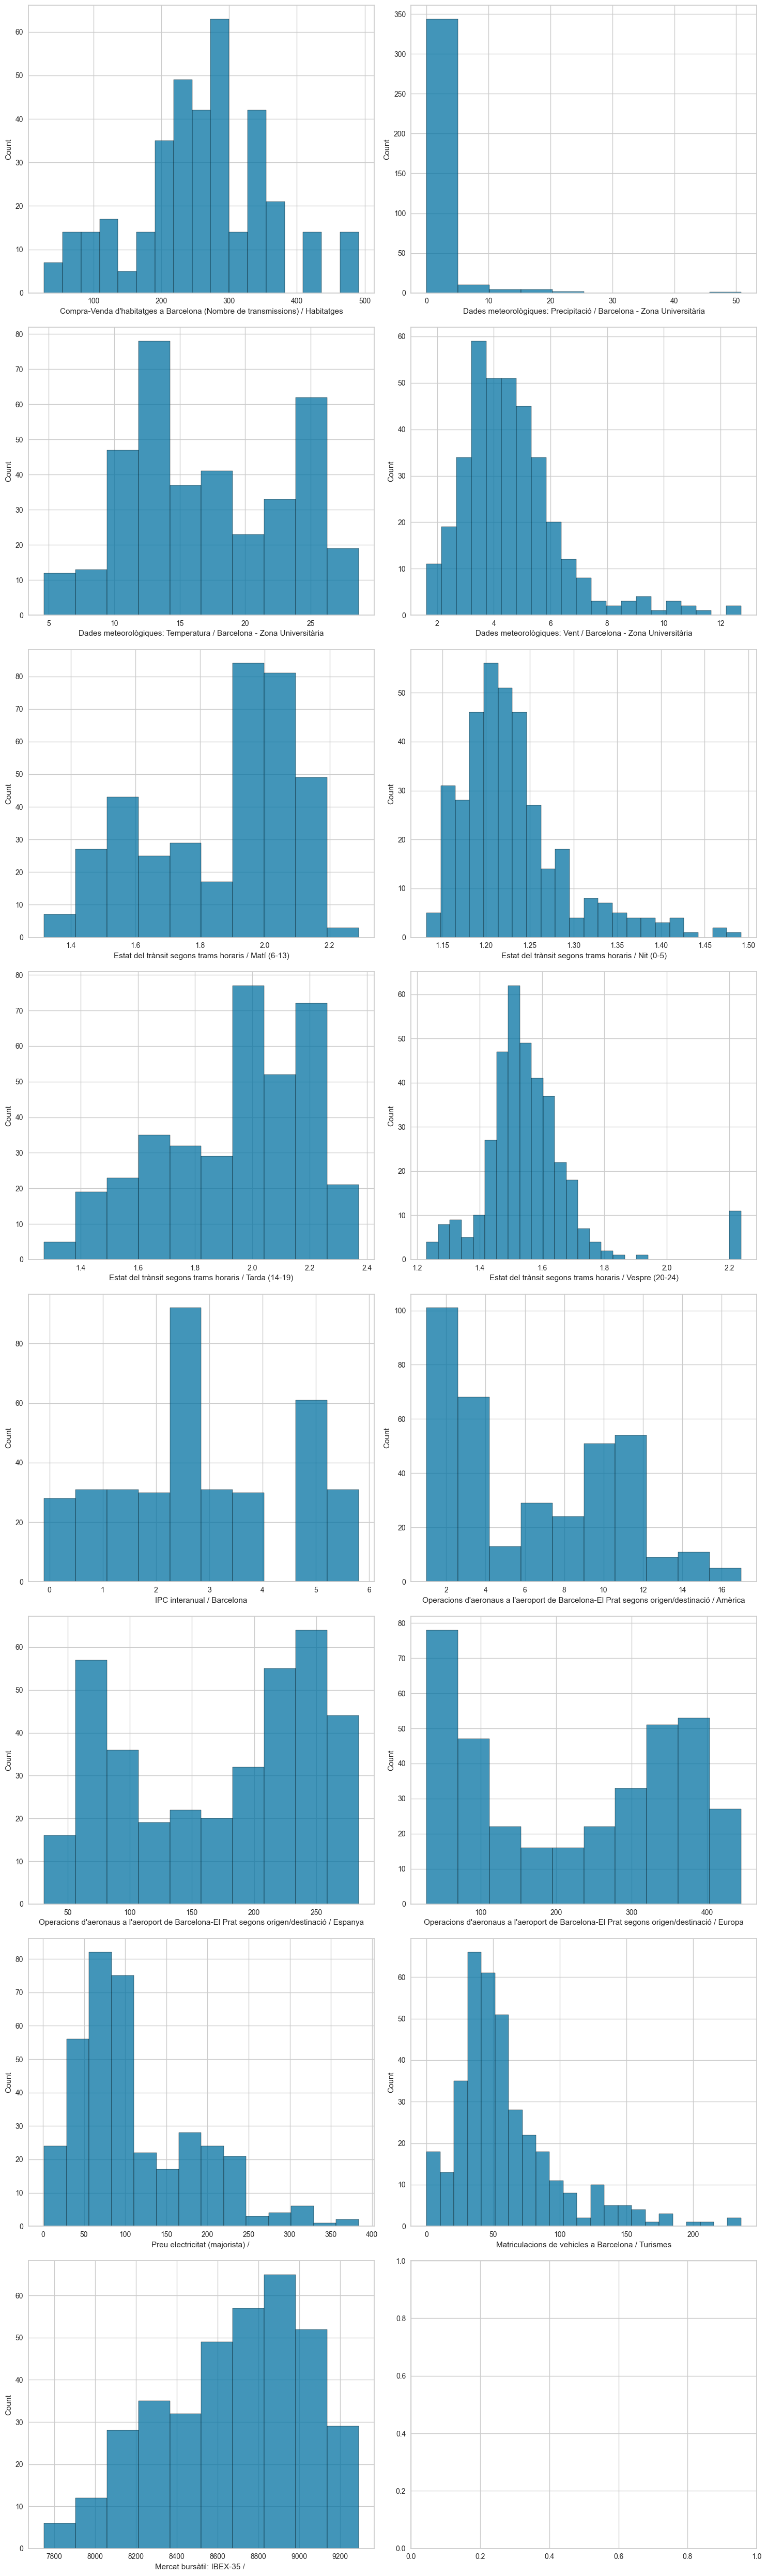

In [44]:
fig, axes = plt.subplots(8,2,figsize=(15,50))

data_frame = pd.DataFrame(data)
data_frame.columns=data.columns
for i, c in enumerate(data.columns):
    ax = axes.reshape(-1)[i]
    if data_frame[c].dtype.kind == 'O':
        a = sns.countplot(x=c,data=data_frame,ax=ax)
    else:
        b = sns.histplot(x=c,data=data_frame,ax=ax)
plt.tight_layout()

In [45]:
X= data.iloc[:,:-1]
y= data.loc[:,'Mercat bursàtil: IBEX-35 / '].copy()

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Sin variables categoricas ni valores peridos, todo ok para hacer una regresion lineal

Miramos el PCA

In [47]:
pca = PCA().fit(X_train)

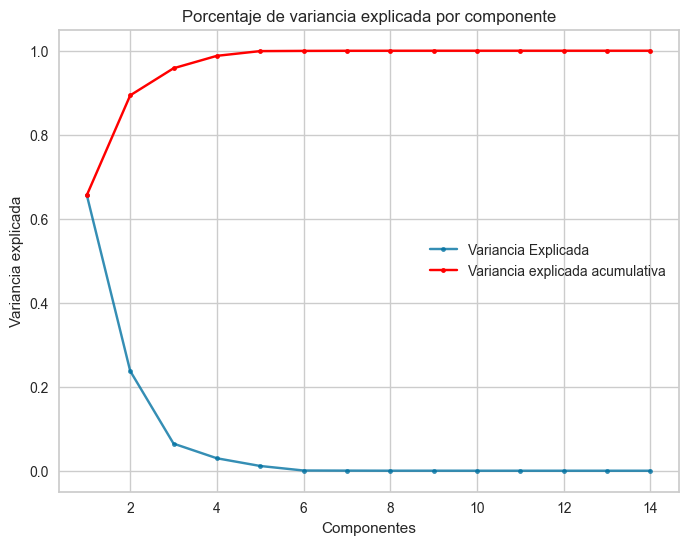

In [48]:
fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada");
y_label = plt.ylabel('Variancia explicada');
x_label = plt.xlabel('Componentes');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa");
plt.legend();
plt.title('Porcentaje de variancia explicada por componente');

Con 2 no esta del todo mal, pero podria ser mejor la vd

<AxesSubplot: >

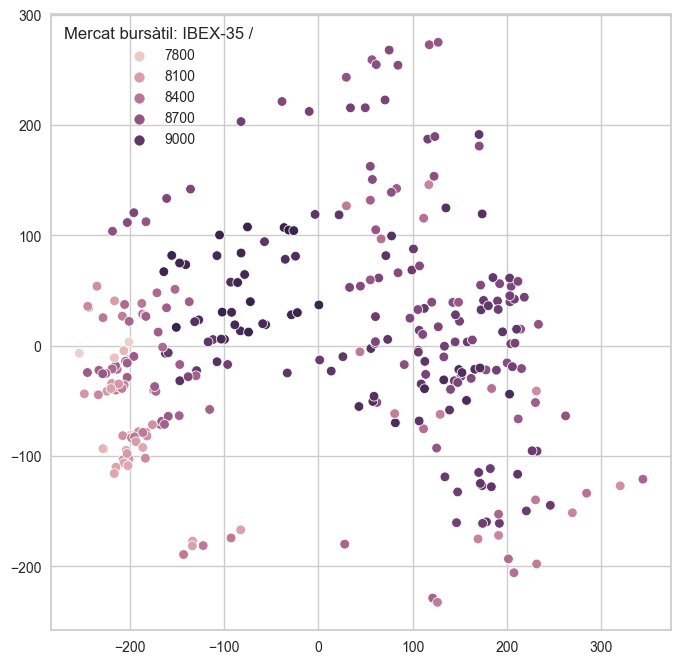

In [49]:
X_trans = pca.transform(X_train)
plt.figure(figsize=(8,8));
sns.scatterplot(x=X_trans[:,0], y=X_trans[:,1], hue=y_train)

In [50]:
from sklearn.linear_model import LinearRegression, PoissonRegressor, Lasso, LassoCV
from sklearn.model_selection import train_test_split,  KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [101]:
lr = LinearRegression();

lr.fit(X_train,y_train);
r2_lr = np.mean(cross_val_score(lr.fit(X_train,y_train),X_train,y_train))

r2_results = pd.DataFrame({'lr':r2_lr},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,lr.predict(X_test))]
r2_results.loc['lambda','lr']=0
r2_results

,lr
CV R2,0.668543
Test R2,0.636017
lambda,0.000000


In [90]:
lambdas = [1e-3,1e-2,0.1, 0.5,1,5,10,50,100]

In [91]:
ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(X_train, y_train)

r2_ridge = np.mean(cross_val_score(ridge, X_train, y_train, cv=5, scoring='r2'))

r2_results = pd.DataFrame({'RidgeRegression':r2_ridge},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,ridge.predict(X_test))]
r2_results.loc['lambda','RidgeRegression']=10
r2_results

,RidgeRegression
CV R2,0.667893
Test R2,0.636386
lambda,10.000000


In [77]:
lasso_cv =LassoCV(alphas=lambdas,cv=5,tol=1e-1).fit(X_train,y_train)

r2_lasso =  np.mean(cross_val_score(lasso_cv, X_train,y_train))

r2_results = pd.DataFrame({'LASSO':r2_lasso},index=['CV R2'])
r2_results.loc['Test R2', :] =[r2_score(y_test,lasso_cv.predict(X_test))]
r2_results.loc['lambda','LASSO']=lasso_cv.alpha_
r2_results

,LASSO
CV R2,0.668167
Test R2,0.636032
lambda,0.001000


In [93]:
from yellowbrick.regressor import prediction_error

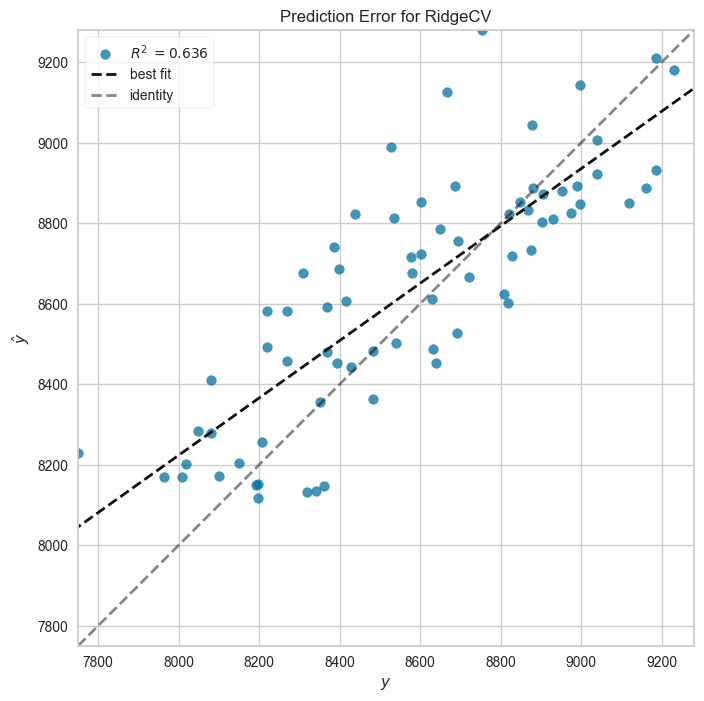

In [94]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(ridge, X_test, y_test, is_fitted=True)

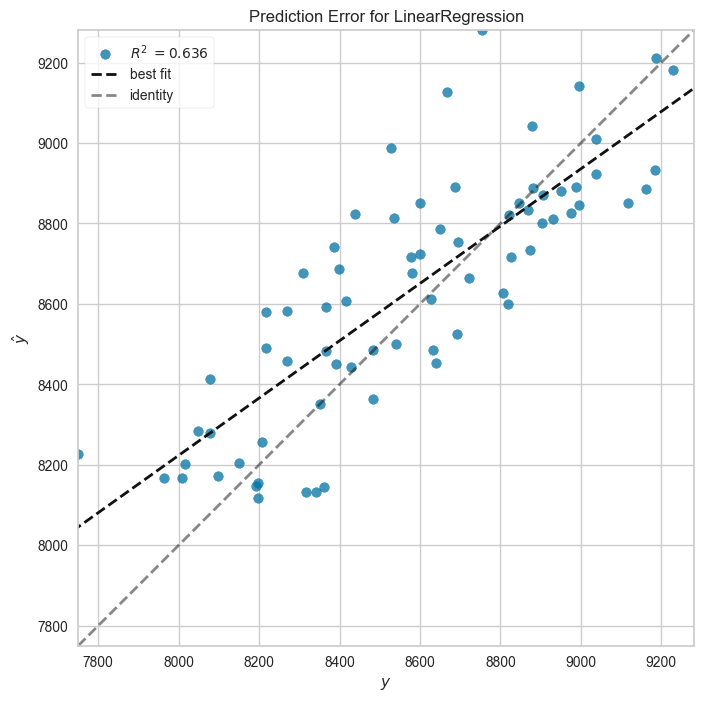

In [102]:
plt.figure(figsize=(8,8))
visualizer = prediction_error(lr, X_test, y_test, is_fitted=True)

In [98]:
from scipy import stats

AttributeError: 'PoissonRegressor' object has no attribute 'resid'

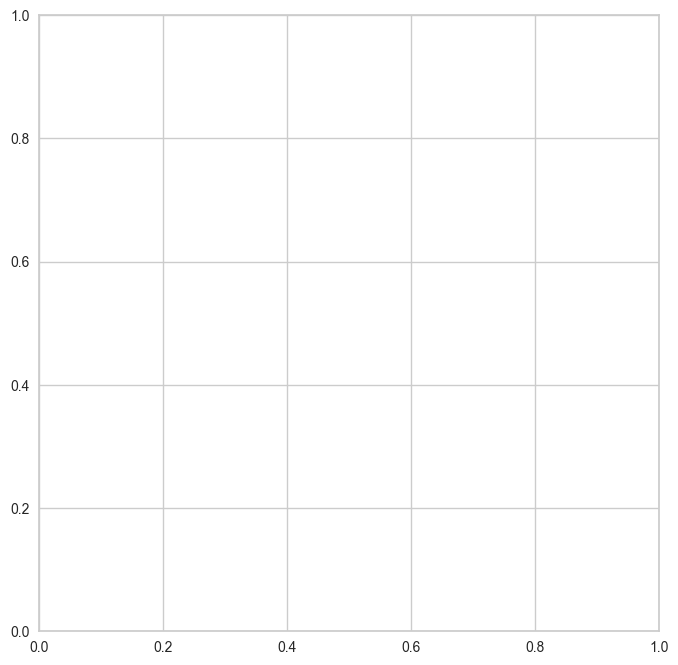

In [100]:
fig, ax = plt.subplots(figsize=(8,8))
stats.probplot(lr.resid, plot=plt);

In [ ]:
weights = pd.DataFrame({'lr':lr.coef_, 'ridge_cv':ridge.coef_, 'lasso_cv':lasso_cv.coef_},index=X_train.columns)
fig,  ax = plt.subplots( figsize = (20,1));
sns.heatmap(weights.T.loc[['lr'],:].abs(),annot=True, linewidths=.5,ax=ax,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=False);

plt.figure(figsize = (20,1));
sns.heatmap(weights.T.loc[['ridge_cv'],:].abs(),annot=True, linewidths=.5,cbar=False,xticklabels=True);